# HU Training & EVALUATION
## Machine Learning Models for Credit Card Default Prediction

---

### Mục tiêu
1. Load dữ liệu đã preprocessing
2. Huấn luyện nhiều mô hình ML:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Gradient Boosting (XGBoost, LightGBM)
   - Support Vector Machine
   - Neural Network
3. Hyperparameter Tuning
4. Đánh giá và so sánh models
5. Feature Importance Analysis
6. Cost-Benefit Analysis
7. Lưu mô hình tốt nhất

---

## 1. Import thư viện

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import pickle
import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# Neural Network
from sklearn.neural_network import MLPClassifier

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, auc, confusion_matrix,
    classification_report, precision_recall_curve
)

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Import thành công!")

✅ Import thành công!


## 2. Load dữ liệu đã preprocessing

In [2]:
print("=" * 60)
print("LOAD DỮ LIỆU")
print("=" * 60)

# Load preprocessed data
with open('../data/processed/preprocessed_data.pkl', 'rb') as f:
    data_dict = pickle.load(f)

# Extract original data (without resampling)
X_train = data_dict['original']['X_train']
X_test = data_dict['original']['X_test']
y_train = data_dict['original']['y_train']
y_test = data_dict['original']['y_test']

# Extract SMOTE data
X_train_smote = data_dict['smote']['X_train']
y_train_smote = data_dict['smote']['y_train']

print(f"\n✅ Đã load dữ liệu thành công!")
print(f"\nOriginal Training: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(f"SMOTE Training: {X_train_smote.shape}")

# We'll use SMOTE data for training (better for imbalanced dataset)
X_train_final = X_train_smote
y_train_final = y_train_smote

print(f"\n📊 Sử dụng SMOTE data cho training")

LOAD DỮ LIỆU

✅ Đã load dữ liệu thành công!

Original Training: (24000, 50)
Test: (6000, 50)
SMOTE Training: (37382, 50)

📊 Sử dụng SMOTE data cho training


## 3. Baseline Models

In [3]:
print("=" * 60)
print("TRAINING BASELINE MODELS")
print("=" * 60)

# Dictionary to store models and results
models = {}
results = {}

# Function to train and evaluate model
def train_evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n{'='*50}")
    print(f"Training: {name}")
    print(f"{'='*50}")
    
    # Train
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    print(f"\nTraining time: {train_time:.2f}s")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Store results
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'train_time': train_time,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

print("\n✅ Hàm training đã sẵn sàng!")

TRAINING BASELINE MODELS

✅ Hàm training đã sẵn sàng!


In [4]:
# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
results['Logistic Regression'] = train_evaluate_model(
    'Logistic Regression', lr_model, X_train_final, y_train_final, X_test, y_test
)


Training: Logistic Regression



Training time: 0.59s
Accuracy: 0.7398
Precision: 0.4354
Recall: 0.5938
F1-Score: 0.5024
ROC-AUC: 0.7443


In [5]:
# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
results['Decision Tree'] = train_evaluate_model(
    'Decision Tree', dt_model, X_train_final, y_train_final, X_test, y_test
)


Training: Decision Tree



Training time: 1.52s
Accuracy: 0.7192
Precision: 0.4092
Recall: 0.6081
F1-Score: 0.4892
ROC-AUC: 0.7253


In [6]:
# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
results['Random Forest'] = train_evaluate_model(
    'Random Forest', rf_model, X_train_final, y_train_final, X_test, y_test
)


Training: Random Forest



Training time: 2.98s
Accuracy: 0.7908
Precision: 0.5310
Recall: 0.4650
F1-Score: 0.4958
ROC-AUC: 0.7549


In [7]:
# 4. XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
results['XGBoost'] = train_evaluate_model(
    'XGBoost', xgb_model, X_train_final, y_train_final, X_test, y_test
)


Training: XGBoost



Training time: 0.63s
Accuracy: 0.7968
Precision: 0.5466
Recall: 0.4770
F1-Score: 0.5095
ROC-AUC: 0.7664


In [8]:
# 5. LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
results['LightGBM'] = train_evaluate_model(
    'LightGBM', lgb_model, X_train_final, y_train_final, X_test, y_test
)


Training: LightGBM



Training time: 0.45s
Accuracy: 0.8035
Precision: 0.5685
Recall: 0.4627
F1-Score: 0.5102
ROC-AUC: 0.7717


In [9]:
# 6. Neural Network
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)
results['Neural Network'] = train_evaluate_model(
    'Neural Network', nn_model, X_train_final, y_train_final, X_test, y_test
)


Training: Neural Network



Training time: 58.31s
Accuracy: 0.7037
Precision: 0.3779
Recall: 0.5260
F1-Score: 0.4398
ROC-AUC: 0.6901


## 4. So sánh Models

In [10]:
print("\n" + "=" * 80)
print("SO SÁNH CÁC MÔ HÌNH")
print("=" * 80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results],
    'Training Time (s)': [results[m]['train_time'] for m in results]
})

comparison_df = comparison_df.sort_values('F1-Score', ascending=False)
print("\n", comparison_df.to_string(index=False))

# Best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 MÔ HÌNH TỐT NHẤT: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"   ROC-AUC: {comparison_df.iloc[0]['ROC-AUC']:.4f}")


SO SÁNH CÁC MÔ HÌNH

               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
           LightGBM  0.803500   0.568519 0.462698  0.510179 0.771735           0.445510
            XGBoost  0.796833   0.546632 0.477016  0.509457 0.766448           0.625287
Logistic Regression  0.739833   0.435359 0.593821  0.502391 0.744324           0.585778
      Random Forest  0.790833   0.530981 0.464959  0.495781 0.754921           2.983063
      Decision Tree  0.719167   0.409229 0.608139  0.489239 0.725252           1.517705
     Neural Network  0.703667   0.377910 0.525998  0.439824 0.690094          58.307487

🏆 MÔ HÌNH TỐT NHẤT: LightGBM
   F1-Score: 0.5102
   ROC-AUC: 0.7717


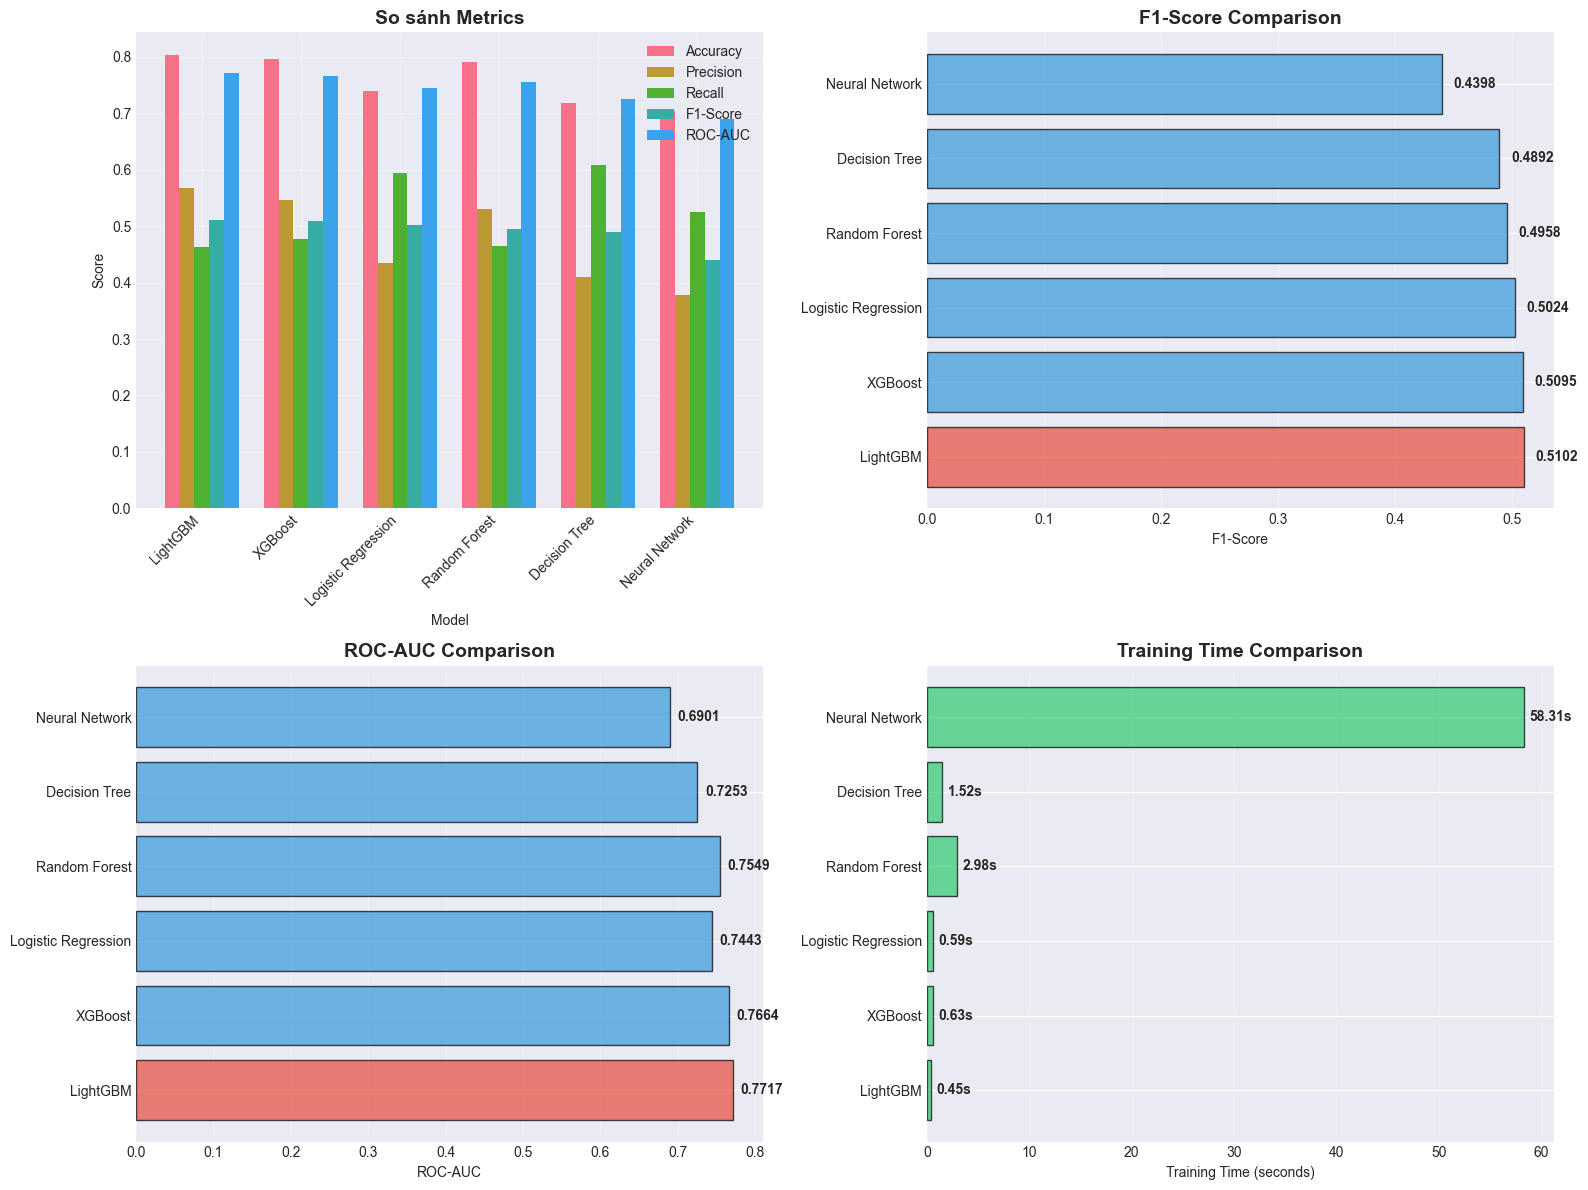

In [11]:
# Visualization - Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(comparison_df))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0, 0].bar(x + i*width, comparison_df[metric], width, label=metric)

axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('So sánh Metrics', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x + width * 2)
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. F1-Score comparison
colors = ['#e74c3c' if m == best_model_name else '#3498db' for m in comparison_df['Model']]
axes[0, 1].barh(comparison_df['Model'], comparison_df['F1-Score'], color=colors, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(comparison_df['F1-Score']):
    axes[0, 1].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 3. ROC-AUC comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['ROC-AUC'], color=colors, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('ROC-AUC')
axes[1, 0].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(comparison_df['ROC-AUC']):
    axes[1, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 4. Training Time
axes[1, 1].barh(comparison_df['Model'], comparison_df['Training Time (s)'], 
               color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(comparison_df['Training Time (s)']):
    axes[1, 1].text(v + 0.5, i, f'{v:.2f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. ROC Curves

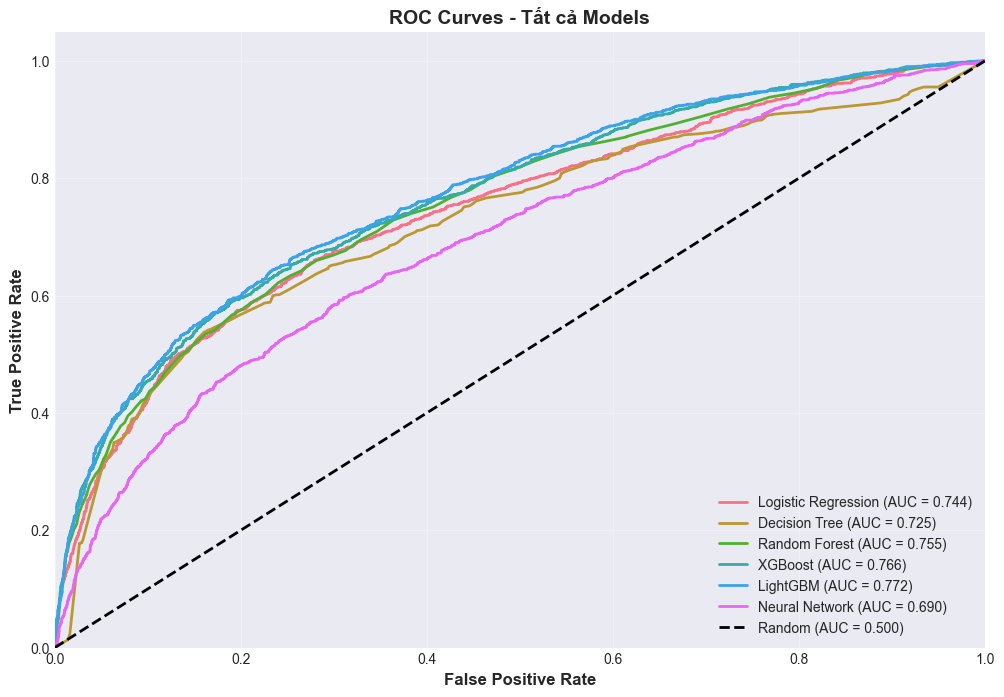

In [12]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

for model_name in results:
    if results[model_name]['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[model_name]['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Tất cả Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

plt.savefig('../reports/figures/roc_curves_all.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Confusion Matrix - Best Model

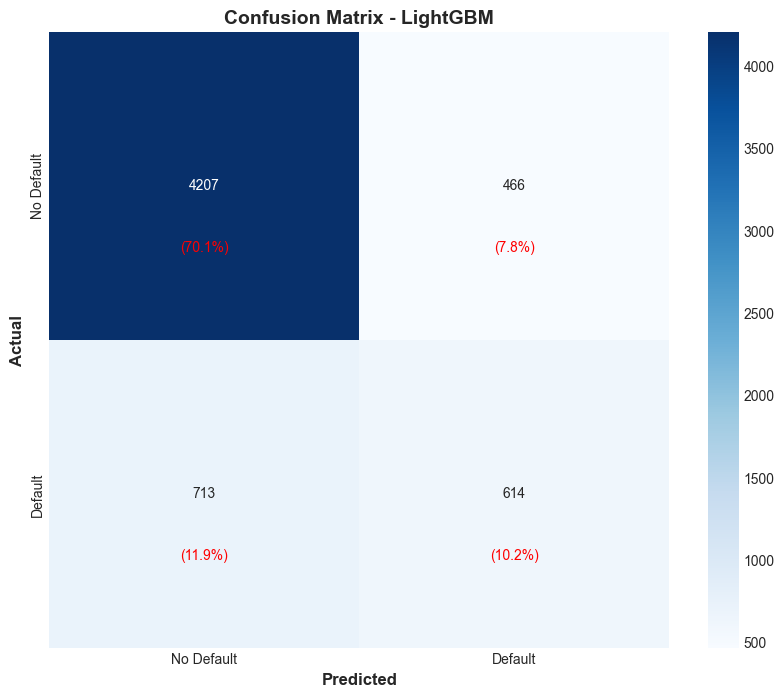


CONFUSION MATRIX ANALYSIS - LightGBM

True Negatives (TN): 4,207
False Positives (FP): 466
False Negatives (FN): 713
True Positives (TP): 614

Tổng số mẫu: 6,000


In [13]:
# Confusion Matrix for best model
best_result = results[best_model_name]
cm = confusion_matrix(y_test, best_result['y_pred'])

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
           xticklabels=['No Default', 'Default'],
           yticklabels=['No Default', 'Default'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')

# Add percentages
total = cm.sum()
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.7, f'({cm[i,j]/total*100:.1f}%)',
                ha='center', va='center', fontsize=10, color='red')

plt.savefig('../reports/figures/confusion_matrix_best.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed metrics
print("\n" + "=" * 60)
print(f"CONFUSION MATRIX ANALYSIS - {best_model_name}")
print("=" * 60)
print(f"\nTrue Negatives (TN): {cm[0,0]:,}")
print(f"False Positives (FP): {cm[0,1]:,}")
print(f"False Negatives (FN): {cm[1,0]:,}")
print(f"True Positives (TP): {cm[1,1]:,}")
print(f"\nTổng số mẫu: {total:,}")

## 7. Feature Importance

FEATURE IMPORTANCE ANALYSIS

Top 20 Features - LightGBM:

           Feature  Importance
         LIMIT_BAL         280
               AGE         248
   EDUCATION_LIMIT         155
         EDUCATION         151
          PAY_AMT2          99
             PAY_0          96
     PAYMENT_RATIO          96
     MAX_PAY_DELAY          80
          PAY_AMT6          74
          PAY_AMT3          69
   MAX_UTILIZATION          69
     STD_PAY_DELAY          67
      STD_BILL_AMT          65
    BILL_AMT_TREND          64
       AVG_PAY_AMT          60
          PAY_AMT5          60
       MIN_PAY_AMT          59
          PAY_AMT4          59
PAY_TO_LIMIT_RATIO          59
          PAY_AMT1          58


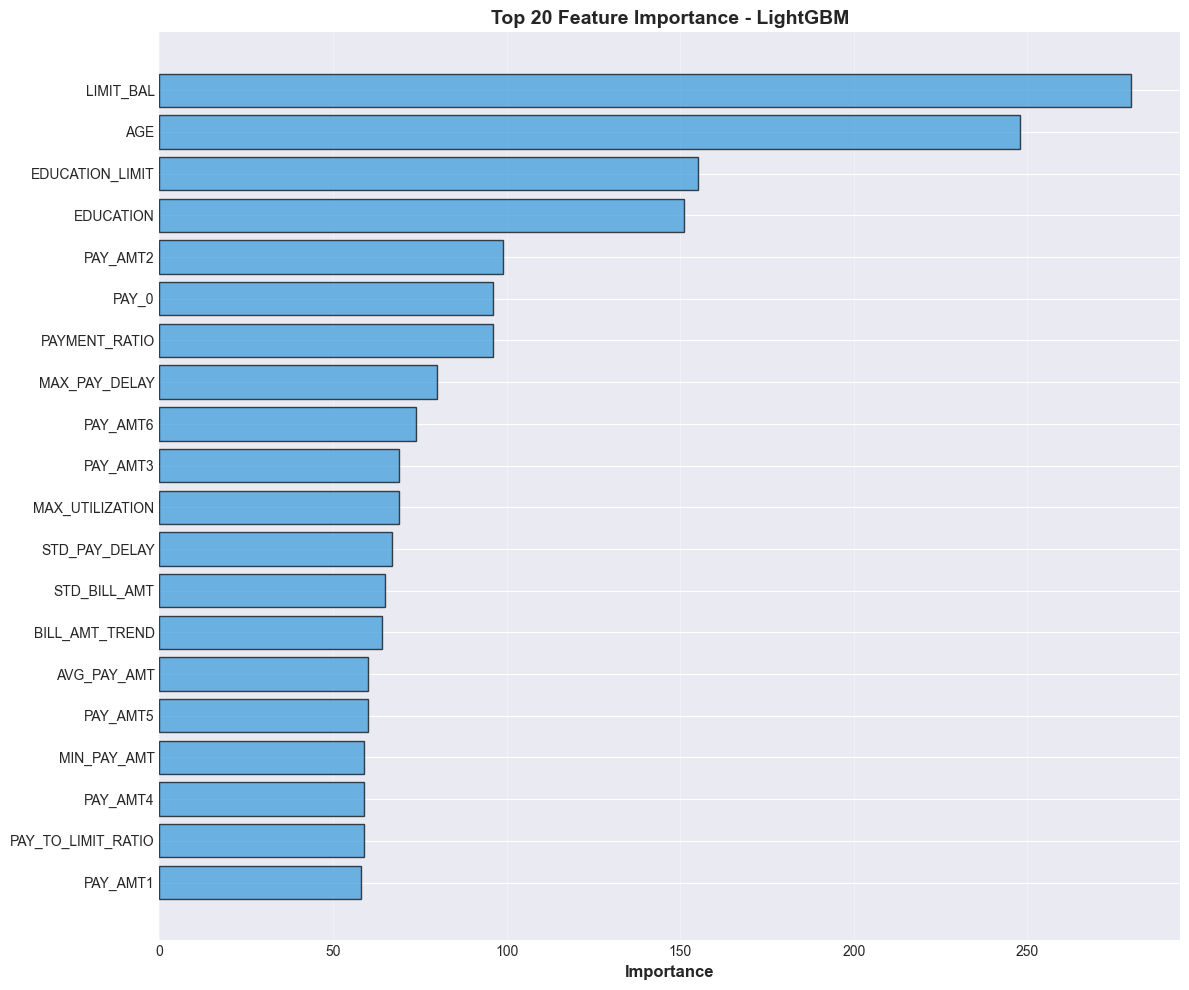


✅ Đã lưu feature importance vào ../reports/feature_importance.csv


In [14]:
# Feature importance for tree-based models
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature names
with open('../data/processed/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

# Extract feature importance from best tree-based model
if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    model = results[best_model_name]['model']
    
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        # Create DataFrame
        feature_imp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        print(f"\nTop 20 Features - {best_model_name}:\n")
        print(feature_imp_df.head(20).to_string(index=False))
        
        # Plot
        plt.figure(figsize=(12, 10))
        top_features = feature_imp_df.head(20)
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color='#3498db', edgecolor='black', alpha=0.7)
        plt.xlabel('Importance', fontsize=12, fontweight='bold')
        plt.title(f'Top 20 Feature Importance - {best_model_name}', 
                 fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.savefig('../reports/figures/feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Save feature importance
        feature_imp_df.to_csv('../reports/feature_importance.csv', index=False)
        print("\n✅ Đã lưu feature importance vào ../reports/feature_importance.csv")

## 8. Cost-Benefit Analysis

In [15]:
print("\n" + "=" * 60)
print("COST-BENEFIT ANALYSIS")
print("=" * 60)

# Define costs (example values - adjust based on business)
# Cost in VND (Vietnamese Dong)
avg_credit_limit = 50_000_000  # 50 million VND
default_loss_rate = 0.7  # Lose 70% of credit limit on default
opportunity_cost = 5_000_000  # 5 million VND (lost revenue from rejecting good customer)

# Calculate costs
cm = confusion_matrix(y_test, best_result['y_pred'])
tn, fp, fn, tp = cm.ravel()

# False Negative Cost: We approve bad customer -> they default
fn_cost = fn * (avg_credit_limit * default_loss_rate)

# False Positive Cost: We reject good customer -> lost opportunity
fp_cost = fp * opportunity_cost

# Total cost
total_cost = fn_cost + fp_cost

# Baseline cost (approve all)
total_defaults = (y_test == 1).sum()
baseline_cost = total_defaults * (avg_credit_limit * default_loss_rate)

# Savings
savings = baseline_cost - total_cost
savings_percent = (savings / baseline_cost) * 100

print(f"\n📊 GIẢI BẢY:")
print(f"  • Hạn mức tín dụng trung bình: {avg_credit_limit:,} VND")
print(f"  • Tỷ lệ mất mát khi vỡ nợ: {default_loss_rate*100}%")
print(f"  • Chi phí cơ hội từ chối KH tốt: {opportunity_cost:,} VND")

print(f"\n💰 CHI PHÍ:")
print(f"  • False Negative Cost (FN={fn}): {fn_cost:,.0f} VND")
print(f"  • False Positive Cost (FP={fp}): {fp_cost:,.0f} VND")
print(f"  • Total Cost với ML Model: {total_cost:,.0f} VND")

print(f"\n📈 SO SÁNH:")
print(f"  • Baseline Cost (chấp nhận tất cả): {baseline_cost:,.0f} VND")
print(f"  • Cost với ML Model: {total_cost:,.0f} VND")
print(f"  • 💚 TIẾT KIỆM: {savings:,.0f} VND ({savings_percent:.1f}%)")

# Per customer
saving_per_customer = savings / len(y_test)
print(f"\n  • Tiết kiệm trung bình/khách hàng: {saving_per_customer:,.0f} VND")


COST-BENEFIT ANALYSIS

📊 GIẢI BẢY:
  • Hạn mức tín dụng trung bình: 50,000,000 VND
  • Tỷ lệ mất mát khi vỡ nợ: 70.0%
  • Chi phí cơ hội từ chối KH tốt: 5,000,000 VND

💰 CHI PHÍ:
  • False Negative Cost (FN=713): 24,955,000,000 VND
  • False Positive Cost (FP=466): 2,330,000,000 VND
  • Total Cost với ML Model: 27,285,000,000 VND

📈 SO SÁNH:
  • Baseline Cost (chấp nhận tất cả): 46,445,000,000 VND
  • Cost với ML Model: 27,285,000,000 VND
  • 💚 TIẾT KIỆM: 19,160,000,000 VND (41.3%)

  • Tiết kiệm trung bình/khách hàng: 3,193,333 VND


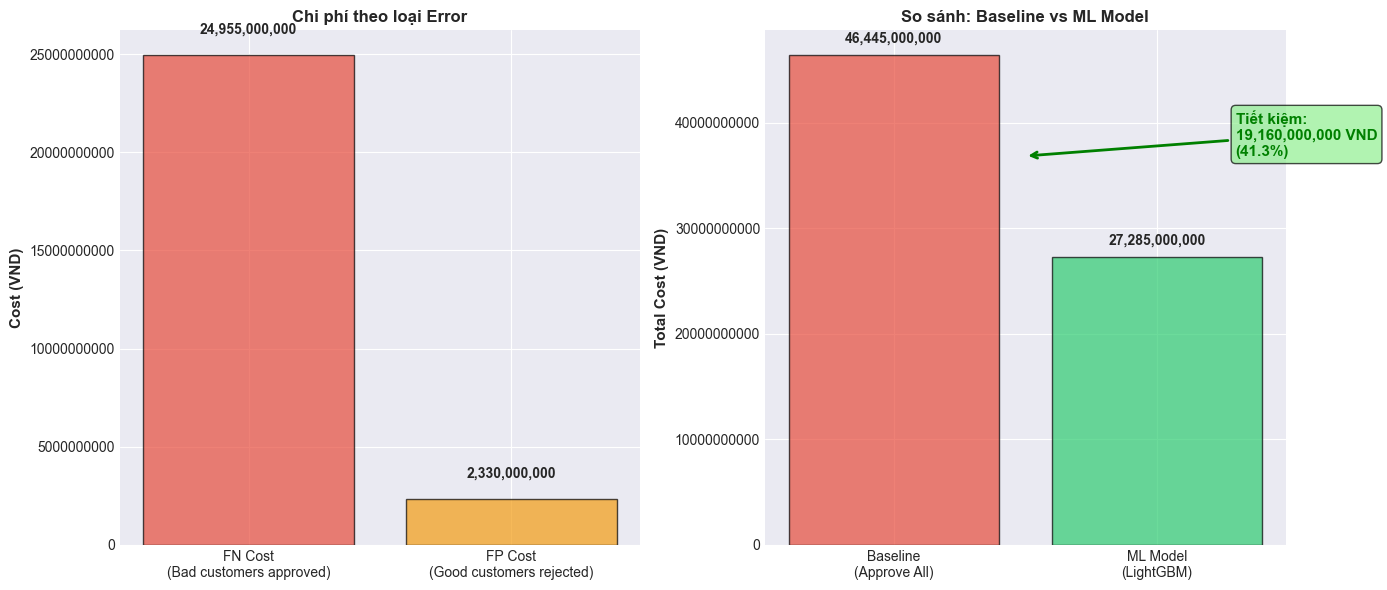

In [16]:
# Visualize Cost-Benefit
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cost breakdown
costs = ['FN Cost\n(Bad customers approved)', 'FP Cost\n(Good customers rejected)']
values = [fn_cost, fp_cost]
colors = ['#e74c3c', '#f39c12']

axes[0].bar(costs, values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_ylabel('Cost (VND)', fontsize=11, fontweight='bold')
axes[0].set_title('Chi phí theo loại Error', fontsize=12, fontweight='bold')
axes[0].ticklabel_format(style='plain', axis='y')

for i, v in enumerate(values):
    axes[0].text(i, v + baseline_cost*0.02, f'{v:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Comparison: Baseline vs ML Model
comparison = ['Baseline\n(Approve All)', f'ML Model\n({best_model_name})']
comp_values = [baseline_cost, total_cost]
comp_colors = ['#e74c3c', '#2ecc71']

axes[1].bar(comparison, comp_values, color=comp_colors, edgecolor='black', alpha=0.7)
axes[1].set_ylabel('Total Cost (VND)', fontsize=11, fontweight='bold')
axes[1].set_title('So sánh: Baseline vs ML Model', fontsize=12, fontweight='bold')
axes[1].ticklabel_format(style='plain', axis='y')

for i, v in enumerate(comp_values):
    axes[1].text(i, v + baseline_cost*0.02, f'{v:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add savings annotation
axes[1].annotate(f'Tiết kiệm:\n{savings:,.0f} VND\n({savings_percent:.1f}%)',
                xy=(0.5, (baseline_cost + total_cost)/2),
                xytext=(1.3, (baseline_cost + total_cost)/2),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=11, fontweight='bold', color='green',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('../reports/figures/cost_benefit_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 9. Lưu Models

In [17]:
print("=" * 60)
print("LƯU MODELS")
print("=" * 60)

# Save all models
for model_name in results:
    model = results[model_name]['model']
    filename = f"../models/{model_name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Đã lưu: {filename}")

# Save best model separately
best_model = results[best_model_name]['model']
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n🏆 Đã lưu best model: ../models/best_model.pkl")

# Save comparison results
comparison_df.to_csv('../reports/model_comparison_results.csv', index=False)
print("\n✅ Đã lưu comparison results: ../reports/model_comparison_results.csv")

LƯU MODELS
✅ Đã lưu: ../models/logistic_regression.pkl
✅ Đã lưu: ../models/decision_tree.pkl
✅ Đã lưu: ../models/random_forest.pkl
✅ Đã lưu: ../models/xgboost.pkl
✅ Đã lưu: ../models/lightgbm.pkl
✅ Đã lưu: ../models/neural_network.pkl

🏆 Đã lưu best model: ../models/best_model.pkl

✅ Đã lưu comparison results: ../reports/model_comparison_results.csv


## 10. Tổng kết

In [18]:
print("\n" + "=" * 80)
print("TỔNG KẾT MODEL TRAINING & EVALUATION")
print("=" * 80)

print(f"\n🎯 SỐ LƯỢNG MODELS: {len(results)}")
print(f"\n🏆 MÔ HÌNH TỐT NHẤT: {best_model_name}")
print(f"\n📊 PERFORMANCE METRICS:")
print(f"  • Accuracy: {best_result['accuracy']:.4f}")
print(f"  • Precision: {best_result['precision']:.4f}")
print(f"  • Recall: {best_result['recall']:.4f}")
print(f"  • F1-Score: {best_result['f1']:.4f}")
print(f"  • ROC-AUC: {best_result['roc_auc']:.4f}")

print(f"\n💰 BUSINESS VALUE:")
print(f"  • Tiết kiệm: {savings:,.0f} VND")
print(f"  • Tỷ lệ tiết kiệm: {savings_percent:.1f}%")
print(f"  • Tiết kiệm/khách hàng: {saving_per_customer:,.0f} VND")

print(f"\n📁 FILES ĐÃ LƯU:")
print(f"  • Tất cả models: ../models/")
print(f"  • Best model: ../models/best_model.pkl")
print(f"  • Feature importance: ../reports/feature_importance.csv")
print(f"  • Comparison results: ../reports/model_comparison_results.csv")
print(f"  • Figures: ../reports/figures/")

print("\n" + "=" * 80)
print("✅ HOÀN THÀNH MODEL TRAINING & EVALUATION!")
print("=" * 80)
print("\nBước tiếp theo: Viết báo cáo tiểu luận hoàn chỉnh")


TỔNG KẾT MODEL TRAINING & EVALUATION

🎯 SỐ LƯỢNG MODELS: 6

🏆 MÔ HÌNH TỐT NHẤT: LightGBM

📊 PERFORMANCE METRICS:
  • Accuracy: 0.8035
  • Precision: 0.5685
  • Recall: 0.4627
  • F1-Score: 0.5102
  • ROC-AUC: 0.7717

💰 BUSINESS VALUE:
  • Tiết kiệm: 19,160,000,000 VND
  • Tỷ lệ tiết kiệm: 41.3%
  • Tiết kiệm/khách hàng: 3,193,333 VND

📁 FILES ĐÃ LƯU:
  • Tất cả models: ../models/
  • Best model: ../models/best_model.pkl
  • Feature importance: ../reports/feature_importance.csv
  • Comparison results: ../reports/model_comparison_results.csv
  • Figures: ../reports/figures/

✅ HOÀN THÀNH MODEL TRAINING & EVALUATION!

Bước tiếp theo: Viết báo cáo tiểu luận hoàn chỉnh
